# TASK-2

Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.

Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [1]:
#Load the required packages that are required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [2]:
#Load the dataset
ad=pd.read_csv(r"C:\Users\KISHORE\Desktop\Oasis_Infobyte_Docs\Advertising.csv")

In [3]:
ad.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
ad.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [6]:
ad.shape

(200, 5)

In [7]:
ad.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [8]:
ad.isnull().sum().sum()

0

In [9]:
ad.duplicated().any()

False

In [10]:
ad.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
ad.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
ad.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
# Correlation between independent and dependent variable
corr = ad.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

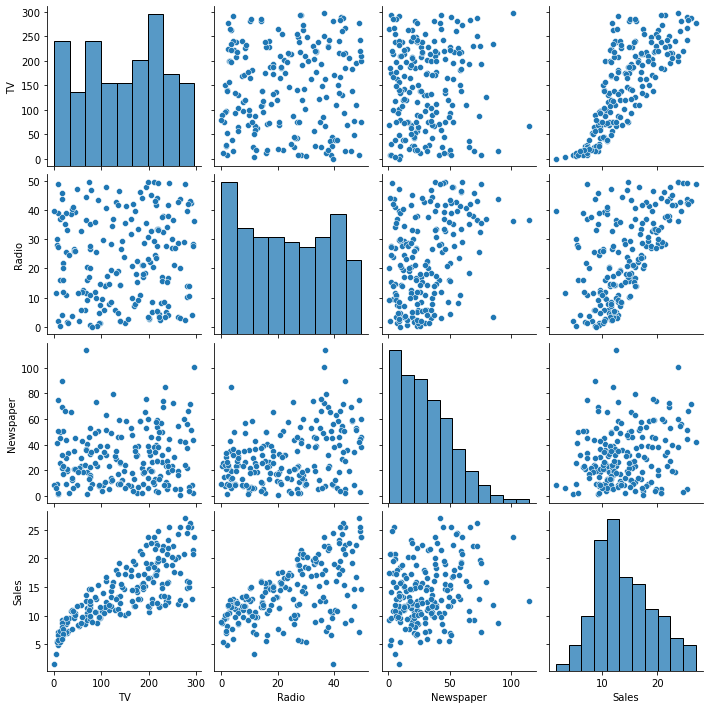

In [18]:
sns.pairplot(ad)
plt.show()

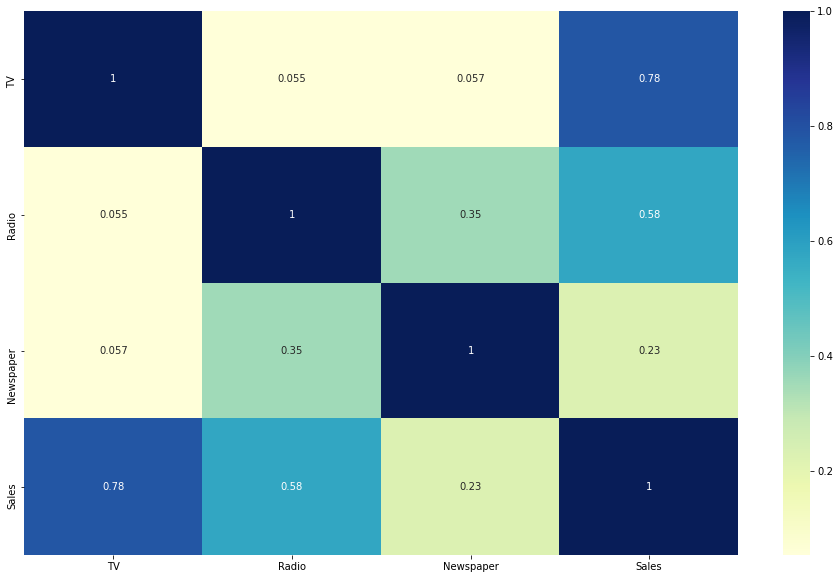

In [20]:
plt.figure(figsize = (16, 10))
sns.heatmap(ad.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [27]:
x=ad.drop('Sales',axis=1)
y=ad['Sales']

In [28]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

In [30]:
x=mmscaler.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [42]:
x_train.shape

(140, 3)

In [43]:
y_train.shape

(140,)

In [44]:
x_test.shape

(60, 3)

In [45]:
y_test.shape

(60,)

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred=LR.predict(x_test)

Text(0, 0.5, 'y_pred')

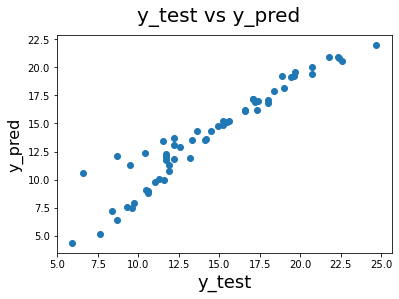

In [50]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean_absolute_error:",mean_absolute_error(y_test,y_pred))
print("Mean_squared_error:",mean_squared_error(y_test,y_pred))
print("Squre_Mean_absolute_error:",np.sqrt(mean_absolute_error(y_test,y_pred)))
print("r2_score:",r2_score(y_test,y_pred))

Mean_absolute_error: 1.0638483124072036
Mean_squared_error: 1.8506819941636967
Squre_Mean_absolute_error: 1.031430226630577
r2_score: 0.9058622107532246
